In [1]:
"""
Custom data generator to work with BraTS2020 dataset.
Can be used as a template to create own custom data generators. 

No image processing operations are performed here, just load data from local directory
in batches. 

"""


'\nCustom data generator to work with BraTS2020 dataset.\nCan be used as a template to create own custom data generators. \n\nNo image processing operations are performed here, just load data from local directory\nin batches. \n\n'

In [2]:
#from tifffile import imsave, imread
import os
import numpy as np

from matplotlib import pyplot as plt
import random
import tensorflow as tf


2024-01-15 00:55:35.531256: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-15 00:55:35.980123: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-15 00:55:35.981810: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-15 00:55:37.232741: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [1]:

# Set GPU device
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate memory on the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)


"""
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")
"""

NameError: name 'tf' is not defined

In [23]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            print(image_name)
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

In [24]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size


In [25]:
train_img_dir = "BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "BraTS2020_TrainingData/input_data_128/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

In [26]:
batch_size = 2

In [27]:
assert(len(train_mask_list) == len(train_img_list))
len(train_img_list)

644

In [28]:
img_num = random.randint(0,len(train_mask_list)-1)
for i in range(len(train_mask_list)-1):
    assert(sorted(train_img_list)[i].split('_')[1] == sorted(train_mask_list)[i].split('_')[1])

In [29]:
train_img_list.sort()
train_mask_list.sort()

In [30]:
train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

In [31]:
#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()
# 01322

image_00002.npy
image_00003.npy
mask_00002.npy
mask_00003.npy


In [32]:
img.shape, msk.shape

((2, 128, 128, 128, 4), (2, 128, 128, 128, 4))

In [33]:
img_num = random.randint(0,img.shape[0]-1)
print(img_num)
# img_num = 2
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)
test_mask.shape

1


(128, 128, 128)

slice nr. 93


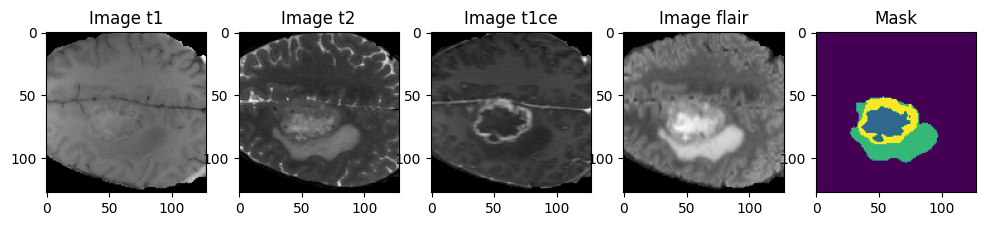

In [38]:
n_slice=random.randint(0, test_mask.shape[2])
# n_slice = 64
print("slice nr.", n_slice)

plt.figure(figsize=(12, 8))

plt.subplot(151)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image t1')

plt.subplot(152)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t2')

plt.subplot(153)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t1ce')

plt.subplot(154)
plt.imshow(test_img[:,:,n_slice, 3], cmap='gray')
plt.title('Image flair')

plt.subplot(155)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [39]:
test_img.shape, test_mask.shape


((128, 128, 128, 4), (128, 128, 128))

In [40]:
msk.shape

(2, 128, 128, 128, 4)